In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, ZeroPadding2D, Dropout, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: c:\Programming\ML\machine-learning\box_assigner\Titanic---project-1


In [3]:
data_genarator_train = ImageDataGenerator(
    rescale = 1.0/255.0,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 50,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.4,
    fill_mode = 'nearest'
)

data_genarator_test = ImageDataGenerator(
    rescale = 1/255.0
)


In [38]:
train = data_genarator_train.flow_from_directory(
    'c:/Programming/ML/machine-learning/box_assigner/chest_xray/train',
    target_size=(500,500),
    color_mode = 'grayscale',
    class_mode='binary', 
    batch_size=20
    )

Found 5216 images belonging to 2 classes.


In [39]:
validation = data_genarator_train.flow_from_directory(
    'c:/Programming/ML/machine-learning/box_assigner/chest_xray/val',
    target_size=(500,500),
    color_mode = 'grayscale',
    class_mode='binary', 
    batch_size=20
    )

Found 16 images belonging to 2 classes.


In [40]:
test = data_genarator_test.flow_from_directory(
    'c:/Programming/ML/machine-learning/box_assigner/chest_xray/test',
    target_size=(500,500),
    color_mode = 'grayscale',
    class_mode='binary', 
    batch_size=20
    )

Found 624 images belonging to 2 classes.


In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(500,500,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\sinah\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 498, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 247, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 121, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,889,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,962,913 (26.56 MB)

 Trainable params: 6,962,913 (26.56 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics= ['accuracy'])

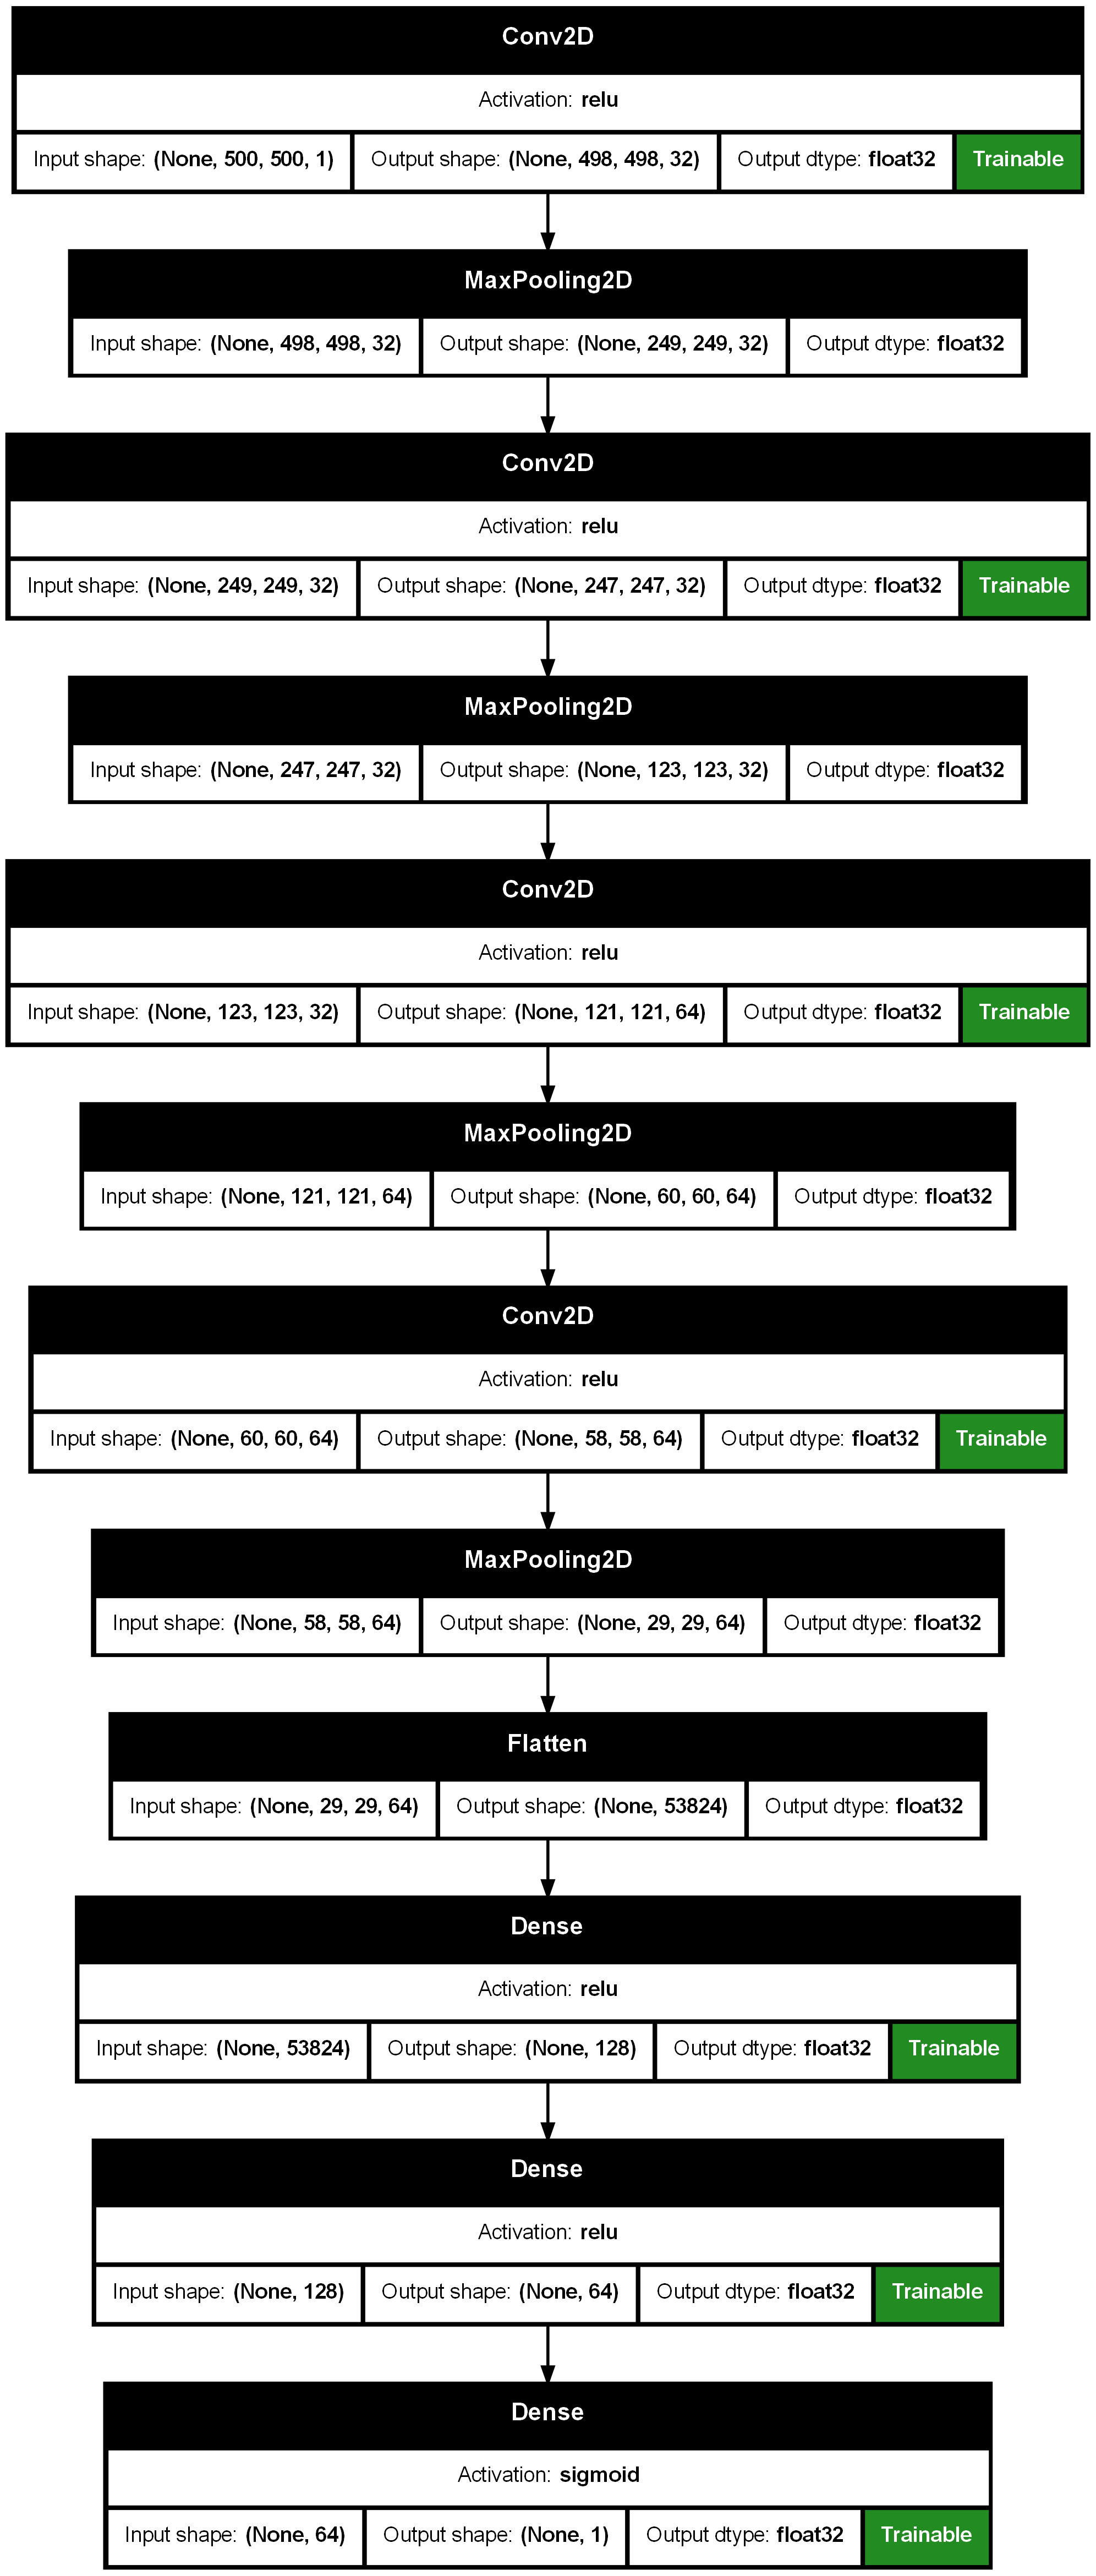

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True, show_trainable=True, show_dtype=True)

In [23]:
train.classes

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train.classes), y=train.classes)
weights

array([1.9448173 , 0.67303226])

In [33]:
class_weights = dict(zip(np.unique(train.classes), weights))
class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

In [37]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)
mch = ModelCheckpoint('chest_xray.keras', monitor='val_loss', mode='min', save_best_only=True)

In [41]:
result = model.fit(train, steps_per_epoch = len(train), validation_data = test, validation_steps = len(test), epochs = 6, callbacks=[es,rlrop,mch], class_weight=class_weights)

c:\Users\sinah\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 903s 3s/step - accuracy: 0.7776 - loss: 0.4670 - val_accuracy: 0.6827 - val_loss: 0.5776 - learning_rate: 0.0010
Epoch 2/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 820s 3s/step - accuracy: 0.8150 - loss: 0.4063 - val_accuracy: 0.7644 - val_loss: 0.4845 - learning_rate: 0.0010
Epoch 3/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 853s 3s/step - accuracy: 0.8188 - loss: 0.3901 - val_accuracy: 0.7051 - val_loss: 0.5072 - learning_rate: 0.0010
Epoch 4/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 687s 3s/step - accuracy: 0.8401 - loss: 0.3588 - val_accuracy: 0.7628 - val_loss: 0.5152 - learning_rate: 0.0010
Epoch 5/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 609s 2s/step - accuracy: 0.8367 - loss: 0.3566 - val_accuracy: 0.7051 - val_loss: 0.5256 - learning_rate: 0.0010


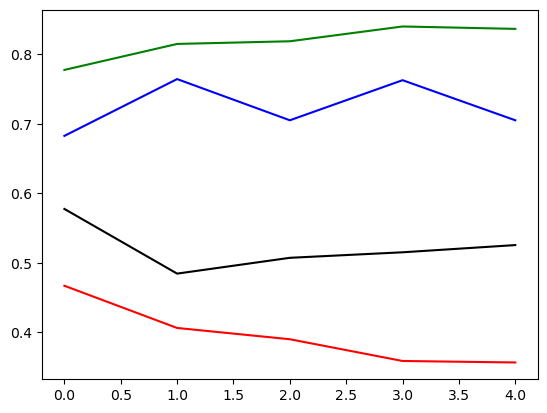

In [51]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], color='green')
plt.plot(result.history['val_accuracy'], color='blue')
plt.plot(result.history['loss'], color='red')
plt.plot(result.history['val_loss'], color='black')
plt.show()



# keras.saving.save_model(model, 'catvsdog.keras')

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

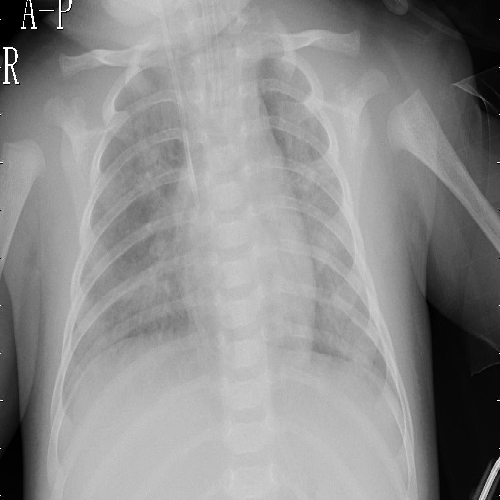

In [44]:
img = load_img('c:/Programming/ML/machine-learning/box_assigner/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg', target_size=(500,500), color_mode='grayscale')
img

In [45]:
img = img_to_array(img)
img

array([[[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 6.],
        [ 6.],
        [ 6.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 6.],
        [ 6.],
        [ 6.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 6.],
        [ 6.],
        [ 6.]],

       ...,

       [[13.],
        [ 0.],
        [ 5.],
        ...,
        [11.],
        [ 3.],
        [17.]],

       [[ 1.],
        [ 4.],
        [ 0.],
        ...,
        [ 4.],
        [11.],
        [ 7.]],

       [[ 0.],
        [ 0.],
        [20.],
        ...,
        [27.],
        [ 0.],
        [ 0.]]], dtype=float32)

In [46]:
model = load_model('chest_xray.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 498, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 247, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 121, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,889,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,888,741 (79.68 MB)

 Trainable params: 6,962,913 (26.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,925,828 (53.12 MB)

In [47]:
import tensorflow as tf

preds = model.predict(tf.expand_dims(img, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


In [48]:
if float(preds[0][0]) > 0.5:
    print('Infected!?!?!')
else:
    print('Normal!')

Infected!?!?!
